In [3]:
import tensorflow
from tensorflow import keras

In [2]:
pip install bing-image-downloader

Note: you may need to restart the kernel to use updated packages.Collecting bing-image-downloader



In [3]:
mkdir images

In [13]:
from bing_image_downloader import downloader
downloader.download("fabric cloth texture",limit = 20,output_dir = 'images')



[!!]Indexing page: 1

[%] Indexed 12 Images on Page 1.


[%] Downloading Image #1 from http://wallup.net/wp-content/uploads/2016/05/25/163541-fabric-texture-plaid.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.creativeswall.com/wp-content/uploads/2014/04/cloth_texture_o1_by_blueamnesiac-d35y5nb.png
[%] File Downloaded !

[%] Downloading Image #3 from https://www.textures.com/system/gallery/photos/FX/Splatter/Fabric/94532/SplatterFabric0024_600.jpg?v=4
[%] File Downloaded !

[%] Downloading Image #4 from https://www.tilingtextures.com/wp-content/uploads/2017/03/0027-1024x1024.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://4.bp.blogspot.com/-rq1ldePw-v0/TtFZMoqKVOI/AAAAAAAAANk/il9MEb7dyAk/s1600/Fabric+01+seamless.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.textures.com/system/gallery/photos/Fabric/Wool/106463/FabricWool0005_download600.jpg
[%] File Downloaded !

[%] Downloading Image #7 from http://www.textures.com/system/

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
import shutil

In [5]:
img = image.load_img("J:/IMAGE+PROCESSING/training/defected/df5.jpg")

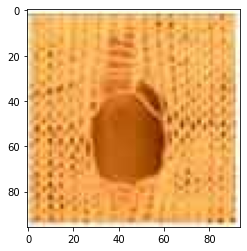

In [6]:
plt.imshow(img)

In [7]:
cv2.imread("J:/IMAGE+PROCESSING/training/defected/df5.jpg").shape

(96, 94, 3)

In [9]:
dir1 = 'J:/IMAGE+PROCESSING/training_gray/def_gray'
dir2 = 'J:/IMAGE+PROCESSING/training_gray/non_def_gray'
dir3 = 'J:/IMAGE+PROCESSING/validate_gray/def_gray'
dir4 = 'J:/IMAGE+PROCESSING/validate_gray/non_def_gray'
if os.path.exists(dir1):
    shutil.rmtree(dir1)
os.makedirs(dir1)
if os.path.exists(dir2):
    shutil.rmtree(dir2)
os.makedirs(dir2)
if os.path.exists(dir3):
    shutil.rmtree(dir3)
os.makedirs(dir3)
if os.path.exists(dir4):
    shutil.rmtree(dir4)
os.makedirs(dir4)
images_path1 = glob.glob('J:/IMAGE+PROCESSING/training/defected/*.jpg')
images_path2 = glob.glob('J:/IMAGE+PROCESSING/training/non_defected/*.jpg')
images_path3 = glob.glob('J:/IMAGE+PROCESSING/validate/defected/*.jpg')
images_path4 = glob.glob('J:/IMAGE+PROCESSING/validate/non_defected/*.jpg')


i = 0
for image in images_path1:
    img = cv2.imread(image)
    gray_images = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    cv2.imwrite('J:/IMAGE+PROCESSING/training_gray/def_gray/image%02i.jpg' %i,bin_img)
    i+=1
    cv2.waitKey(600)
    cv2.destroyAllWindows()
i = 0
for image in images_path2:
    img = cv2.imread(image)
    gray_images = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    cv2.imwrite('J:/IMAGE+PROCESSING/training_gray/non_def_gray/image%02i.jpg' %i,bin_img)
    i+=1
    cv2.waitKey(600)
    cv2.destroyAllWindows()
i = 0
for image in images_path3:
    img = cv2.imread(image)
    gray_images = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    cv2.imwrite('J:/IMAGE+PROCESSING/validate_gray/def_gray/image%02i.jpg' %i,bin_img)
    i+=1
    cv2.waitKey(600)
    cv2.destroyAllWindows()
i = 0
for image in images_path4:
    img = cv2.imread(image)
    gray_images = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    cv2.imwrite('J:/IMAGE+PROCESSING/validate_gray/non_def_gray/image%02i.jpg' %i,bin_img)
    i+=1
    cv2.waitKey(600)
    cv2.destroyAllWindows()

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import glob
import numpy as np
import shutil

In [37]:
img_gray = image.load_img("J:/IMAGE+PROCESSING/training_gray/def_gray/image05.jpg")

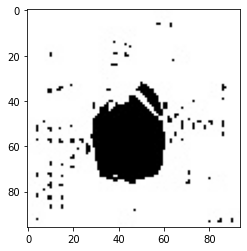

In [38]:
plt.imshow(img_gray)

In [39]:
cv2.imread("J:/IMAGE+PROCESSING/training_gray/def_gray/image05.jpg").shape

(96, 94, 3)

In [11]:
train = ImageDataGenerator(rescale = 1./255)
validation = ImageDataGenerator(rescale = 1./255)

In [12]:
train_dataset = train.flow_from_directory('J:/IMAGE+PROCESSING/training_gray',target_size = (200,200),batch_size = 10,class_mode ='binary',color_mode = 'grayscale')
validate_dataset = validation.flow_from_directory('J:/IMAGE+PROCESSING/validate_gray',target_size = (200,200),batch_size = 10,class_mode ='binary',color_mode = 'grayscale')

Found 1696 images belonging to 2 classes.
Found 119 images belonging to 2 classes.


In [13]:
train_dataset.class_indices

{'def_gray': 0, 'non_def_gray': 1}

In [14]:
train_dataset.classes

array([0, 0, 0, ..., 1, 1, 1])

In [15]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,1)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    #
                                    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    ##
                                    tf.keras.layers.Flatten(),
                                    ##
                                    tf.keras.layers.Dense(512,activation ='relu'),
                                    tf.keras.layers.Dense(1,activation ='sigmoid')
                                   ])

In [16]:
model.compile(loss = 'binary_crossentropy',optimizer = 'rmsprop',metrics = ['accuracy'])

In [17]:
model_fit = model.fit(train_dataset,batch_size=10,steps_per_epoch = 5,epochs = 35,
                     validation_data = validate_dataset,verbose = 1)

Epoch 1/35
5/5 [==============================] - 24s 4s/step - loss: 3.1382 - accuracy: 0.5483 - val_loss: 2.1145 - val_accuracy: 0.1597
Epoch 2/35
5/5 [==============================] - 12s 3s/step - loss: 0.7011 - accuracy: 0.6561 - val_loss: 0.9074 - val_accuracy: 0.1597
Epoch 3/35
5/5 [==============================] - 12s 2s/step - loss: 0.3549 - accuracy: 0.7533 - val_loss: 0.8992 - val_accuracy: 0.5882
Epoch 4/35
5/5 [==============================] - 11s 2s/step - loss: 0.3537 - accuracy: 0.8233 - val_loss: 1.3983 - val_accuracy: 0.4202
Epoch 5/35
5/5 [==============================] - 11s 2s/step - loss: 0.4913 - accuracy: 0.7792 - val_loss: 0.9903 - val_accuracy: 0.4118
Epoch 6/35
5/5 [==============================] - 11s 2s/step - loss: 0.2039 - accuracy: 0.9208 - val_loss: 0.5741 - val_accuracy: 0.7731
Epoch 7/35
5/5 [==============================] - 12s 3s/step - loss: 0.4809 - accuracy: 0.7547 - val_loss: 0.7095 - val_accuracy: 0.7395
Epoch 8/35
5/5 [==================

In [18]:
#Evaluate the model against test data that never saw the training process. 
#_, test_acc = model.evaluate(test, test)
_, valid_acc = model.evaluate(validate_dataset)
print("Accuracy on the validation dataset = ", (valid_acc * 100.0), "%")
#print("Accuracy on the test dataset = ", (test_acc * 100.0), "%")

12/12 [==============================] - 5s 374ms/step - loss: 1.7333 - accuracy: 0.6891
Accuracy on the validation dataset =  68.90756487846375 %


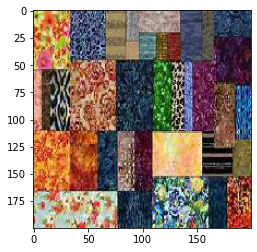

It is Not Defected


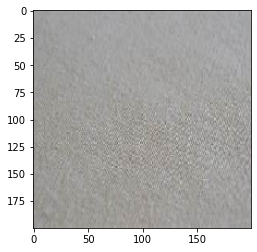

It is Defected


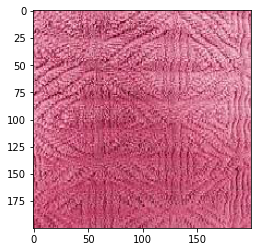

It is Defected


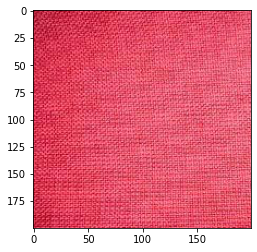

It is Defected


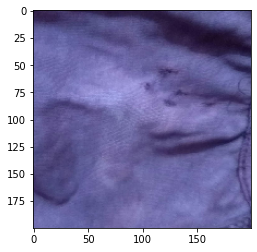

It is Not Defected


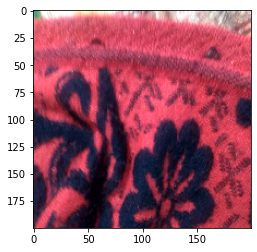

It is Not Defected


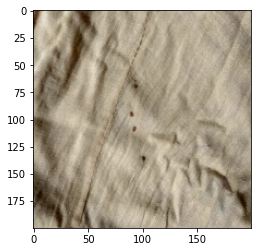

It is Not Defected


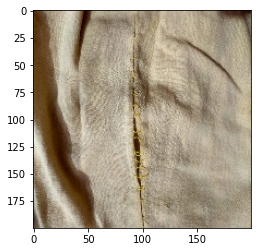

It is Not Defected


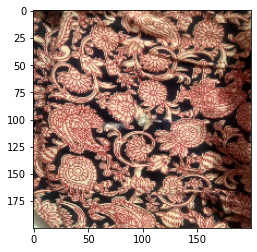

It is Not Defected


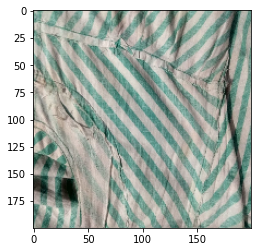

It is Not Defected


In [20]:
dir_path = 'J:/IMAGE+PROCESSING/test'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//' + i,target_size = (200,200))
    gray_images = cv2.cvtColor(np.float32(img),cv2.COLOR_BGR2GRAY)
    ret, bin_img = cv2.threshold(gray_images,127,255,cv2.THRESH_BINARY)
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(bin_img)
    X = np.expand_dims(X,axis =0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 1:
        print("It is Not Defected")
    else:
        print("It is Defected")

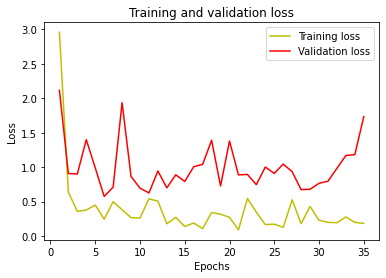

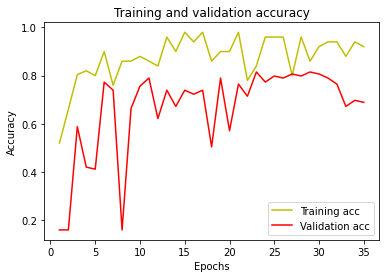

In [25]:
loss = model_fit.history['loss']
val_loss = model_fit.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = model_fit.history['accuracy']
val_acc = model_fit.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(val, X)

sns.heatmap(cm, annot=True)

ValueError: Classification metrics can't handle a mix of binary and unknown targets